In [1]:

#%%
import numpy as np


#%%
a = np.array([[1, 2, 3], [4, 5, 6]])
 
b = np.array([[4, 0, 0]])
 


#%%
i = 0
while i < 5:
    b = np.append(b, a, axis = 0)
    i += 1
print(b)


#%%





[[4 0 0]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


In [2]:

#%%
import numpy as np


#%%
a = np.array([[1, 2, 3], [4, 5, 6]])
 
b = np.array([[4, 0, 0]])
 


#%%
i = 0
while i < 5:
    b = np.append(b, a, axis = 0)
    i += 1
print(b)


#%%





[[4 0 0]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


In [1]:

#%%
import numpy as np


#%%
a = np.array([[1, 2, 3], [4, 5, 6]])
 
b = np.array([[4, 0, 0]])
 


#%%
i = 0
while i < 5:
    b = np.append(b, a, axis = 0)
    i += 1
print(b)


#%%





[[4 0 0]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


In [2]:
import numpy as np



In [3]:
a = np.array([[1, 2, 3], [4, 5, 6]])
 
b = np.array([[4, 0, 0]])
 



In [4]:
i = 0
while i < 5:
    b = np.append(b, a, axis = 0)
    i += 1
print(b)



[[4 0 0]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


In [6]:
import numpy as np



In [7]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0 
centroids_oldarray = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    centroids_oldarray = centroids_array # create copy of old array for threshold funcion
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
#Clustering threshold, centroid arrays have the dimension k, genes, repeat until distance is smaller than t
def thresh(t):
    global centroids_array, centroids_oldarray, k
    t = 5  #threshold to determine when algorythm is done
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        if d < t:
            i =+ 1 
        new_centroids()
        assign_centroids()
            # können wir wenn wir wollen dann ans ende von kmeans packen anstelle des while loops


# function giving distance between clusters after n iterations            
def improv():      
    global centroids_array, centroids_oldarray, k
    distances = []
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        distances.append(d)
        i =+ 1
    print("Distances of clusters as compared to last generation:" + distances)
        
    
                  
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1
        improv()


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


#%%





TypeError: 'int' object is not subscriptable

In [8]:
centroids_oldarray


0

In [9]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0 
centroids_oldarray = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array, centroids_oldarray
    centroids_oldarray = centroids_array # create copy of old array for threshold funcion
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
#Clustering threshold, centroid arrays have the dimension k, genes, repeat until distance is smaller than t
def thresh(t):
    global centroids_array, centroids_oldarray, k
    t = 5  #threshold to determine when algorythm is done
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        if d < t:
            i =+ 1 
        new_centroids()
        assign_centroids()
            # können wir wenn wir wollen dann ans ende von kmeans packen anstelle des while loops


# function giving distance between clusters after n iterations            
def improv():      
    global centroids_array, centroids_oldarray, k
    distances = []
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        distances.append(d)
        i =+ 1
    print("Distances of clusters as compared to last generation:" + distances)
        
    
                  
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1
        improv()


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


#%%





KeyboardInterrupt: 

In [10]:
print(np.linalg.norm(centroids_array[i, :]-centroids_oldarray[i,:]))


IndexError: index 5 is out of bounds for axis 0 with size 5

In [11]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0 
centroids_oldarray = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array, centroids_oldarray
    centroids_oldarray = centroids_array # create copy of old array for threshold funcion
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
#Clustering threshold, centroid arrays have the dimension k, genes, repeat until distance is smaller than t
def thresh(t):
    global centroids_array, centroids_oldarray, k
    t = 5  #threshold to determine when algorythm is done
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        if d < t:
            i =+ 1 
        new_centroids()
        assign_centroids()
            # können wir wenn wir wollen dann ans ende von kmeans packen anstelle des while loops


# function giving distance between clusters after n iterations            
def improv():      
    global centroids_array, centroids_oldarray, k
    distances = []
    i = 1
    while i <= k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        distances.append(d)
        i =+ 1
    print("Distances of clusters as compared to last generation:" + distances)
        
    
                  
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1
        improv()


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


#%%





KeyboardInterrupt: 

In [12]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0 
centroids_oldarray = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array, centroids_oldarray
    centroids_oldarray = centroids_array # create copy of old array for threshold funcion
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
#Clustering threshold, centroid arrays have the dimension k, genes, repeat until distance is smaller than t
def thresh(t):
    global centroids_array, centroids_oldarray, k
    t = 5  #threshold to determine when algorythm is done
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        if d < t:
            i =+ 1 
        new_centroids()
        assign_centroids()
            # können wir wenn wir wollen dann ans ende von kmeans packen anstelle des while loops


# function giving distance between clusters after n iterations            
def improv():      
    global centroids_array, centroids_oldarray, k
    distances = []
    i = 0
    while i < k: 
        a = centroids_array[i+1,:]
        b = centroids_oldarray[i+1,:]
        d = np.linalg.norm(a-b)
        distances.append(d)
        i =+ 1
    print("Distances of clusters as compared to last generation:" + distances)
        
    
                  
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1
        improv()


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


#%%





KeyboardInterrupt: 

In [13]:
centroids_array[,:]


SyntaxError: invalid syntax (<ipython-input-13-69d0cf86275f>, line 1)

In [14]:
centroids_array



array([[-35.65456009, -46.34889221],
       [-24.794981  ,  36.83473587],
       [231.96157837, 244.82501221],
       [126.63307953, -41.34664154],
       [ 26.74956131, 128.79882812]])

In [15]:
centroids_oldarray


array([[-35.81785965, -45.3184166 ],
       [-24.10580063,  38.80488205],
       [237.59283447, 263.6880188 ],
       [126.26439667, -41.50017166],
       [ 34.58243942, 134.75218201]])

In [16]:
print(np.linalg.norm(centroids_array[1, :]-centroids_oldarray[1,:]))


2.087209993153689


In [17]:
print(np.linalg.norm(centroids_array[0, :]-centroids_oldarray[0,:]))


1.04333443467724


In [18]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0 
centroids_oldarray = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array, centroids_oldarray
    centroids_oldarray = centroids_array # create copy of old array for threshold funcion
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
#Clustering threshold, centroid arrays have the dimension k, genes, repeat until distance is smaller than t
def thresh(t):
    global centroids_array, centroids_oldarray, k
    t = 5  #threshold to determine when algorythm is done
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        if d < t:
            i =+ 1 
        new_centroids()
        assign_centroids()
            # können wir wenn wir wollen dann ans ende von kmeans packen anstelle des while loops


# function giving distance between clusters after n iterations            
def improv():      
    global centroids_array, centroids_oldarray, k
    distances = []
    i = 0
    while i < k: 
        d = np.linalg.norm(centroids_array[i, :] - centroids_oldarray[i,:])
        distances.append(d)
        i =+ 1
    print("Distances of clusters as compared to last generation:" + distances)
        
    
                  
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1
        improv()


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


#%%





KeyboardInterrupt: 

In [19]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0 
centroids_oldarray = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array, centroids_oldarray
    centroids_oldarray = centroids_array # create copy of old array for threshold funcion
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
#Clustering threshold, centroid arrays have the dimension k, genes, repeat until distance is smaller than t
def thresh(t):
    global centroids_array, centroids_oldarray, k
    t = 5  #threshold to determine when algorythm is done
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        if d < t:
            i =+ 1 
        new_centroids()
        assign_centroids()
            # können wir wenn wir wollen dann ans ende von kmeans packen anstelle des while loops


# function giving distance between clusters after n iterations            
def improv():      
    global centroids_array, centroids_oldarray, k
    distances = []
    i = 0
    while i < k: 
        d = np.linalg.norm(centroids_array[i, :] - centroids_oldarray[i,:])
        distances.append(d)
        i += 1
    print("Distances of clusters as compared to last generation:" + distances)
        
    
                  
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1
        improv()


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


#%%





Empty cluster! Correcting centroids.


TypeError: must be str, not list

In [20]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0 
centroids_oldarray = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array, centroids_oldarray
    centroids_oldarray = centroids_array # create copy of old array for threshold funcion
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
#Clustering threshold, centroid arrays have the dimension k, genes, repeat until distance is smaller than t
def thresh(t):
    global centroids_array, centroids_oldarray, k
    t = 5  #threshold to determine when algorythm is done
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        if d < t:
            i =+ 1 
        new_centroids()
        assign_centroids()
            # können wir wenn wir wollen dann ans ende von kmeans packen anstelle des while loops


# function giving distance between clusters after n iterations            
def improv():      
    global centroids_array, centroids_oldarray, k
    distances = []
    i = 0
    while i < k: 
        d = np.linalg.norm(centroids_array[i, :] - centroids_oldarray[i,:])
        distances.append(d)
        i += 1
    print("Distances of clusters as compared to last generation:" + str(distances)
        
    
                  
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1
        improv()


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


#%%





SyntaxError: invalid syntax (<ipython-input-20-11aa0c350618>, line 142)

Empty cluster! Correcting centroids.
Distances of clusters as compared to last generation:[3.215870360097759, 8.728416256436073, 0.9639441539218655, 2.9094725606584966, 69.99695354314062]
Runtime: 0:00:01.491467
kmeans centroids: [[-21.15406418  47.18697739]
 [ 84.86248779 159.92932129]
 [122.64801788 -43.94052124]
 [-37.00775528 -39.18093872]
 [338.52011108 423.98672485]]
Runtime: 0:00:00.096038
sklearnkmeans centroids: [[ 85.96939  173.40834 ]
 [-45.755913 -30.386496]
 [170.0616   -26.324163]
 [-20.951017  47.47405 ]
 [ 46.341545 -71.082695]]


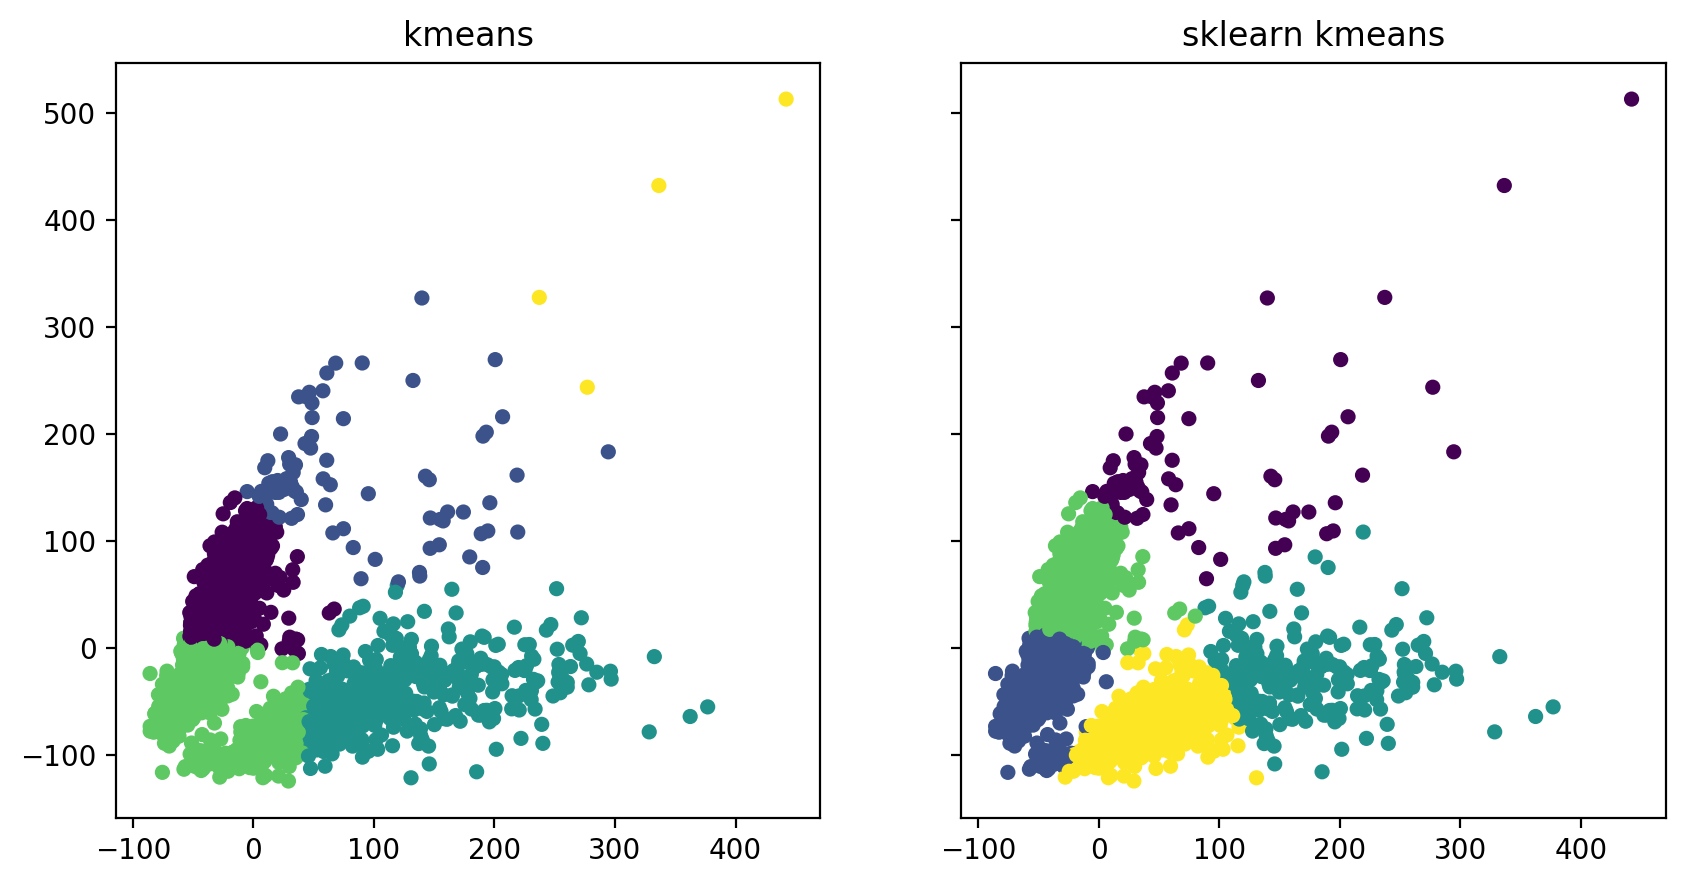

In [21]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0 
centroids_oldarray = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array, centroids_oldarray
    centroids_oldarray = centroids_array # create copy of old array for threshold funcion
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
        
#Clustering threshold, centroid arrays have the dimension k, genes, repeat until distance is smaller than t
def thresh(t):
    global centroids_array, centroids_oldarray, k
    t = 5  #threshold to determine when algorythm is done
    i = 0
    while i < k: 
        a = centroids_array[i,:]
        b = centroids_oldarray[i,:]
        d = np.linalg.norm(a-b)
        if d < t:
            i =+ 1 
        new_centroids()
        assign_centroids()
            # können wir wenn wir wollen dann ans ende von kmeans packen anstelle des while loops


# function giving distance between clusters after n iterations            
def improv():      
    global centroids_array, centroids_oldarray, k
    distances = []
    i = 0
    while i < k: 
        d = np.linalg.norm(centroids_array[i, :] - centroids_oldarray[i,:])
        distances.append(d)
        i += 1
    print("Distances of clusters as compared to last generation:" + str(distances))
        
    
                  
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1
        improv()


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


#%%



